In [47]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [48]:
df = pd.read_csv('/home/cusp/el2666/PUI2016_el2666/Homework3/201502-citibike-tripdata.csv')

In [49]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


In [50]:
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [51]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ageM,ageF
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,NaN,37.0
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,22.0,NaN
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,NaN,46.0
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,NaN,30.0
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,58.0,NaN


In [52]:
df.drop(['starttime', 'stoptime', 'usertype'], axis=1, inplace=True)

In [53]:
df.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
0,801,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,1978.0,2,NaN,37.0
1,379,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,1993.0,1,22.0,NaN
2,2474,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,1969.0,2,NaN,46.0
3,818,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,1985.0,2,NaN,30.0
4,544,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,1957.0,1,58.0,NaN


In [54]:
df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
count,196930.000000,196930.000000,196930.000000,196930.000000,196930.000000,196930.000000,196930.000000,196930.000000,194663.000000,196930.000000,161561.000000,33064.000000
mean,649.383207,438.669949,40.735784,-73.990074,438.540695,40.735530,-73.990391,18120.012278,1975.288031,1.156203,39.915171,38.738326
std,873.231710,321.320871,0.018569,0.011522,321.595789,0.018480,0.011508,2074.916613,11.734009,0.393946,11.755518,11.571452
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14530.000000,1899.000000,0.000000,16.000000,17.000000
25%,340.000000,307.000000,40.723684,-73.997901,307.000000,40.723627,-73.998102,16338.000000,NaN,1.000000,NaN,NaN
50%,507.000000,417.000000,40.737815,-73.990093,415.000000,40.737262,-73.990697,18089.000000,NaN,1.000000,NaN,NaN
75%,764.000000,491.000000,40.750380,-73.981854,491.000000,40.750200,-73.981923,19886.000000,NaN,1.000000,NaN,NaN
max,43016.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21703.000000,1999.000000,2.000000,116.000000,115.000000


In [55]:
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

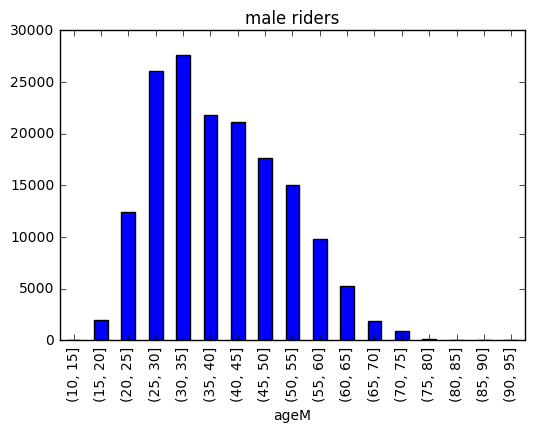

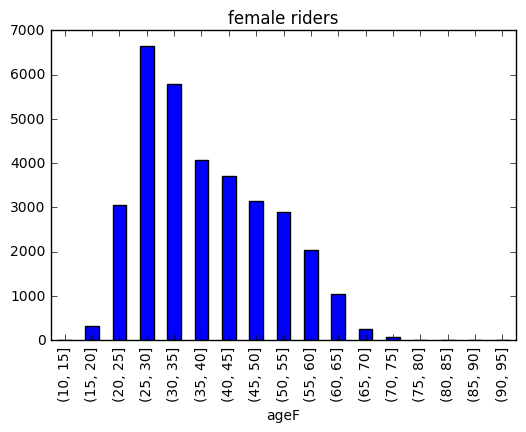

In [56]:
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.002159
(20, 25]       0.013054
(25, 30]       0.052331
(30, 35]       0.056668
(35, 40]       0.044718
(40, 45]       0.026353
(45, 50]       0.012632
(50, 55]       0.007243
(55, 60]       0.008507
(60, 65]       0.007611
(65, 70]       0.003617
(70, 75]       0.000761
(75, 80]       0.000282
(80, 85]       0.000032
(85, 90]       0.000074
(90, 95]       0.000000


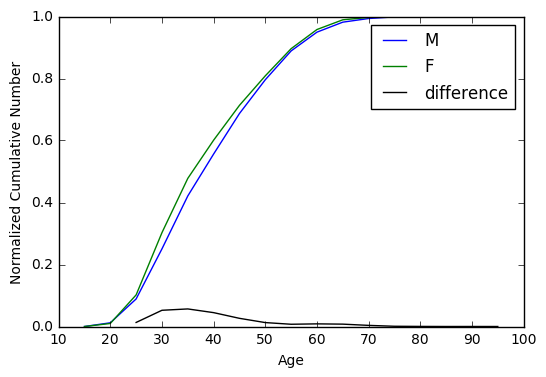

In [57]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

In [58]:
import scipy.stats

In [59]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.062122453007178557, pvalue=1.4566899787430881e-92)


### Description for result above: K-S statistic is small and the p-value is high - we cannot reject the null hypothesis (that the distributions of the two samples are the same)

In [99]:
df1 = df.iloc[::200]

In [100]:
df1['ageM'].dropna(inplace= True)
df1['ageF'].dropna(inplace= True)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/series.py:2571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


### KS test

In [101]:
ks = scipy.stats.ks_2samp(df1.ageM, df1.ageF)
print(ks)

Ks_2sampResult(statistic=0.084292393799568516, pvalue=0.28344160823904585)


### Description: we cannot reject the null hypothesis since p-value is high

### Pearson's test

In [102]:
from scipy.stats import pearsonr

x = [df1.ageM]
y = [df1.ageF]

r_row, p_value = pearsonr(x, y)

ValueError: operands could not be broadcast together with shapes (1,809) (1,161) 

### Spearman's test

In [67]:
scipy.stats.spearmanr([df1.ageM], [df1.ageF])

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:257: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=nan, pvalue=nan)